In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.cm as cm

In [30]:
df = pd.read_csv('New York Skyscrapers.csv')

In [31]:
df.head()

,Name,Height,Floors,Year,Address
0,One World Trade Center,"1,776 (541)\n",94,2014\n,285 Fulton Street\n
1,Central Park Tower,"1,550 (472)\n",99,2021\n,225 West 57th Street\n
2,111 West 57th Street,"1,428 (435)\n",85,2022\n,111 West 57th Street\n
3,One Vanderbilt,"1,401 (427)\n",73,2020\n,1 Vanderbilt Avenue\n
4,432 Park Avenue,"1,397 (426)\n",85,2015\n,432 Park Avenue\n


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     105 non-null    object
 1   Height   106 non-null    object
 2   Floors   106 non-null    int64 
 3   Year     106 non-null    object
 4   Address  106 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.3+ KB


In [33]:
df.describe()

,Floors
count,106.000000
mean,97.169811
std,266.309254
min,42.000000
25%,52.000000
50%,58.000000
75%,67.000000
max,2009.000000


In [34]:
# Delete values in brackets and newline characters
df['Height'] = df['Height'].apply(lambda x: re.sub(r'\(.*\)', '', x).replace('\n', ''))

# Delete characters except values
df['Height'] = df['Height'].apply(lambda x: re.sub(r'\D', '', x))

# Change format of Height to int
df['Height'] = df['Height'].astype(int)

In [35]:
df.head()

,Name,Height,Floors,Year,Address
0,One World Trade Center,1776,94,2014\n,285 Fulton Street\n
1,Central Park Tower,1550,99,2021\n,225 West 57th Street\n
2,111 West 57th Street,1428,85,2022\n,111 West 57th Street\n
3,One Vanderbilt,1401,73,2020\n,1 Vanderbilt Avenue\n
4,432 Park Avenue,1397,85,2015\n,432 Park Avenue\n


In [38]:
# Remove rows where 'Year' is NaN
df.dropna(subset=['Year'], inplace=True)

# Replace '—' with NaN in the 'Year' column
df['Year'] = df['Year'].replace('—', pd.np.nan)

# Convert 'Year' to a numeric data type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Remove rows where 'Year' is NaN after converting to numeric
df.dropna(subset=['Year'], inplace=True)

C:\Users\Iman\AppData\Local\Temp\ipykernel_4392\3794913010.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Year'] = df['Year'].replace('—', pd.np.nan)


In [42]:
# Change format of Floors to int
df['Floors'] = df['Floors'].astype(int)
# Change format of Year to int
df['Year'] = df['Year'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 105
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     100 non-null    object
 1   Height   101 non-null    int32 
 2   Floors   101 non-null    int32 
 3   Year     101 non-null    int32 
 4   Address  101 non-null    object
dtypes: int32(3), object(2)
memory usage: 3.6+ KB


In [44]:
df.head()

,Name,Height,Floors,Year,Address
0,One World Trade Center,1776,94,2014,285 Fulton Street\n
1,Central Park Tower,1550,99,2021,225 West 57th Street\n
2,111 West 57th Street,1428,85,2022,111 West 57th Street\n
3,One Vanderbilt,1401,73,2020,1 Vanderbilt Avenue\n
4,432 Park Avenue,1397,85,2015,432 Park Avenue\n


<b>Total Height and Floors by Decades</b>

In [58]:
# Make decade
df['Decade'] = pd.cut(df['Year'], bins=range(1900, 2031, 10), labels=range(1900, 2030, 10))

In [59]:
df_pivot = df.pivot_table(index='Decade', values='Height', aggfunc='sum')
df_pivot = df_pivot.sort_index()

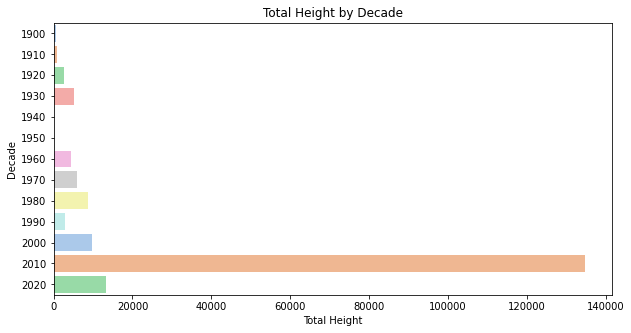

In [60]:
# Make graph of Total Height by Decade
plt.figure(figsize=(10,5))
sns.barplot(data=df_pivot, x='Height', y=df_pivot.index, palette=sns.color_palette('pastel', n_colors=len(df_pivot)))
plt.xlabel('Total Height')
plt.ylabel('Decade')
plt.title('Total Height by Decade')
plt.show()

In [62]:
df_pivot = df.pivot_table(index='Decade', values='Floors', aggfunc='sum')
df_pivot = df_pivot.sort_index()

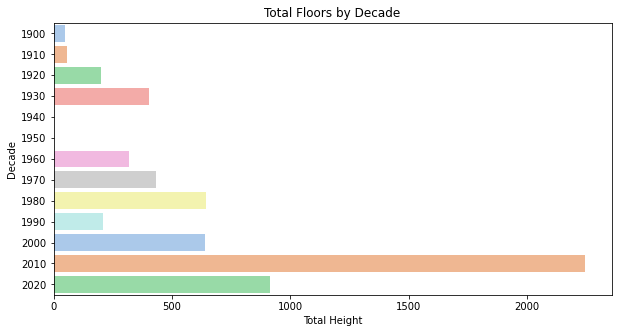

In [65]:
# Make graph of Total Floors by Decade
plt.figure(figsize=(10,5))
sns.barplot(data=df_pivot, x='Floors', y=df_pivot.index, palette=sns.color_palette('pastel', n_colors=len(df_pivot)))
plt.xlabel('Total Height')
plt.ylabel('Decade')
plt.title('Total Floors by Decade')
plt.show()